# pandas exercises

### Note: I've left everything in here, but indicated where my solutions begin and end.

---

We'll use the sample datset from the Social Secury Administration on baby names:
https://www.ssa.gov/oact/babynames/limits.html

Download the "National" version and unzip it.  There will be one file for each year.

This example follows the _Python for Data Analysis_ book closely

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function

Let's start by reading in just a single dataset, for the first year available (1880).  We give the names of the colums here.  The index will just be the line / record number in the file (not really important for us)

- `name`: the name
- `sex`: `'M'` or `'F'`
- `births`: the number of babies born with that name in that year

In [9]:
names_1976 = pd.read_csv('names/yob1976.txt', names=["name", "sex", "births"])
names_1976

,name,sex,births
0,Jennifer,F,59474
1,Amy,F,31341
2,Melissa,F,25093
3,Heather,F,24199
4,Angela,F,22041
5,Michelle,F,19555
6,Kimberly,F,18967
7,Jessica,F,18368
8,Lisa,F,17350
9,Amanda,F,15591


## number of births

Now we want to start doing some analysis.  `.groupby()` creates a new type of container that groups items.  Here, we'll group by sex.

See this:
http://pandas.pydata.org/pandas-docs/stable/groupby.html
https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

for a nice explanation of this method.

In [10]:
names_1976.groupby("sex")["births"].sum()

sex
F    1465106
M    1569843
Name: births, dtype: int64

The above sums the total number of births for each sex.

Note that we can use a column name as a parameter of the object, so we can equivalently do this as:

In [11]:
names_1976.groupby("sex").births.sum()

sex
F    1465106
M    1569843
Name: births, dtype: int64

On its own, you can't print a `GroupBy` object.  You need to do a transformation or filter on it to get back a `Series` or `DataFrame`.

In [12]:
gb = names_1976.groupby("sex")
gb.count()

,name,births
sex,,
F,10900,10900
M,6491,6491


As we saw in the intro, we can propagate a scalar to all indices in the `DataFrame`.  We'll use this to add a new column that represents the year:

In [13]:
names_1976["year"] = 1976
names_1976

,name,sex,births,year
0,Jennifer,F,59474,1976
1,Amy,F,31341,1976
2,Melissa,F,25093,1976
3,Heather,F,24199,1976
4,Angela,F,22041,1976
5,Michelle,F,19555,1976
6,Kimberly,F,18967,1976
7,Jessica,F,18368,1976
8,Lisa,F,17350,1976
9,Amanda,F,15591,1976


## all data sets

Now we can read in all of the datasets.  We will read them in one-by-one and add the "year" column to them.  We'll keep a list of all the `DataFrame`s and then we'll use a pandas method to transform this list of `DataFrame`s into a single `DataFrame`

In [14]:
years = range(1880, 2018)

pieces = []
columns = ["name", "sex", "births"]

# loop through each file
for yr in years:
    # read names, sex, and number of births for the year
    frame = pd.read_csv("names/yob{}.txt".format(yr), names=columns)
    
    # this creates a new column and gives all rows the same value -- the year
    frame["year"] = yr
    
    # create list of dataframes
    pieces.append(frame)

# create a single dataframe through concatenation -- ignore_index means that
# we don't care about the original line numbers
names = pd.concat(pieces, ignore_index=True)

In [15]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Now the same name may have multiple entries corresponding to multiple years:

In [17]:
names.loc[names.name == "Mary"]

,name,sex,births,year
0,Mary,F,7065,1880
1273,Mary,M,27,1880
2000,Mary,F,6919,1881
3238,Mary,M,29,1881
3935,Mary,F,8148,1882
5276,Mary,M,30,1882
6062,Mary,F,8012,1883
7407,Mary,M,32,1883
8146,Mary,F,9217,1884
9610,Mary,M,36,1884


## pivot tables

a _pivot table_ creates a new dataframe from our orignal one, usually summarizing the data in a new way.  In particular, with a pivot table, we can create a new index and columns, with the data in the `DataFrame` reduced via some operation across another column.

Here, the column that we are going to aggregrate is "births", and the function will will use for the aggregating is `sum` (to sum over the names).

In [18]:
names.sample(10) # get a random sample

,name,sex,births,year
823311,Ajamu,M,10,1977
1451107,Nyquan,M,7,2003
1060977,Irvin,M,267,1989
1337684,Shylee,F,24,2000
281387,Orlin,M,30,1930
693430,Jo,M,21,1969
1408049,Trayana,F,6,2002
874358,Beila,F,5,1980
84721,Marie,F,4301,1909
1370762,Ashleynicole,F,12,2001


Get the total number (`aggfunc=sum`) of births (the first argument, `"births"`), per year (`index="year"`), for males and females (`columns="sex"`):

In [19]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum) 

In [20]:
total_births

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442
1885,133055,107799
1886,144533,110784
1887,145981,101413
1888,178622,120851


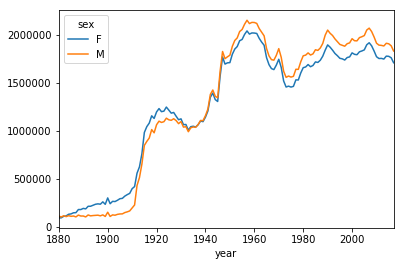

In [21]:
total_births.plot() # plot it

## `.apply()` and new columns

Now we'll use `.groupby()` again to allow use to derive a new column -- the fraction of the births with the name specified by the index.  

`apply()` uses what Pandas calls the _split-apply-combine_ rules, e.g., it:

- splits the data into groups, 
- applies your function, 
- and then intelligently concatenates it back together.  

Here, the result will be a `DataFrame` with the original information and this new column.

In [22]:
def add_prop(group):
    # here, `group` is a data frame
    group["prop"] = group["births"]/group["births"].sum()
    return group

# group first by year, then by sex?
names = names.groupby(["year", "sex"]).apply(add_prop) # passes `names` to the function `add_prop(group)`?

In [23]:
names # first row: proportion of female births in 1880 with name Mary is 0.077, or ~ 8%

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## Q1: Sanity check

Verify that within each of the groups we just used above that the "prop" column sums to 1 (it should be close, to roundoff).  The `np.allclose()` function might be useful here.

---

### Begin my solution to Q1

We want to group the dataframe `names` by year, and then further by sex - this eliminates the `"name"` column, because the names get grouped together for each year and each sex.

Then when we apply the `sum()` method, the only thing left to sum is the `"prop"` column. This gives a new dataframe.

In [28]:
sum_of_props_per_year = names.groupby(["year", "sex"]).sum() # not the prettiest name, but it works
sum_of_props_per_year.head(10)

births  prop
year sex              
1880 F     90993   1.0
     M    110491   1.0
1881 F     91953   1.0
     M    100743   1.0
1882 F    107847   1.0
     M    113686   1.0
1883 F    112319   1.0
     M    104627   1.0
1884 F    129020   1.0
     M    114442   1.0

In [46]:
# get a series for the proportions
sum_prop_series = sum_of_props_per_year["prop"]
sum_prop_series.head(10)

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
Name: prop, dtype: float64

Compare the series above to a `numpy` array of the same length, filled with ones:

In [48]:
num_rows = len(sum_prop_series)
print("The sum of proportions is equal to one for each row:", np.allclose(sum_prop_series, np.ones(num_rows)))

The sum of proportions is equal to one for each row: True


### End my solution to Q1

---

Now we will group by "year" and "sex" and then sort by births to get just the top N most popular names.

Notice that we simply append any additional arguments to our apply function after the function name (this is an example of the `**kwargs` behavior in python

In [68]:
def get_top(group, N=1000):
    # get the N most popular names in the dataframe
    return group.sort_values(by="births", ascending=False)[:N]

grouped = names.groupby(["year", "sex"]) 
top = grouped.apply(get_top, 1000) 

In [69]:
top

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2017 M   1911478     Simeon   M     211  2017  0.000115
         1911479     Yadiel   M     211  2017  0.000115
         1911476        Ira   M     211  2017  0.000115
         1911477     Ledger   M     211  2017  0.000115
         1911475        Avi   M     211  2017  0.000115
         1911480     Maddux   M     210  2017  0.000114
         1911481     Seamus   M     210  2017  0.000114
         1911482        Jad   M     209  2017  0.000114
         1911483   Jeremias   M     209  2017  0.000114
         1911484      Kylen   M     209  2017  0.000114
         1911485     Rashad   M     208  2017  0.000113
         1911486     Santos   M     208  2017  0.000113
         1911489  Dominique   M     207  2017  0.000113
         1911490   Gianluca   M     207  2017  0.000113
         1911491    Jovanni   M     207  2017  0.000113
         1911488      Craig   M     207  2017  0.000113
         1911487     Cedric   M     207  2017  0.000113
         1911492     Bishop   M     205  2017  0.000112
         1911493    Brenden   M     204  2017  0.000111
         1911494      Anton   M     203  2017  0.000111
         1911495     Camron   M     203  2017  0.000111
         1911496  Giancarlo   M     203  2017  0.000111
         1911497       Lyle   M     203  2017  0.000111
         1911498     Alaric   M     202  2017  0.000110
         1911499     Decker   M     202  2017  0.000110
         1911500    Eliezer   M     202  2017  0.000110
         1911501     Ramiro   M     202  2017  0.000110
         1911502    Yisroel   M     202  2017  0.000110
         1911506    Marquis   M     201  2017  0.000110
         1911507     Turner   M     201  2017  0.000110

[275877 rows x 5 columns]

## Q2: split by sex

create two new dataframes, one `boys` with just those in `top` that are "M" and one `girls` with those in `top` who are "F"

---

### Begin my solution to Q2

There may be a better way to do this, but you can just select by the value of the column `"sex"`:

In [122]:
girls = top[top.sex=="F"]
boys = top[top.sex=="M"]

We don't need the `"year"` or `"sex"` columns anymore, so we can delete it:

In [123]:
del girls["year"]
del boys["year"]
del girls["sex"]
del boys["sex"]

In [124]:
girls.head(10)

name  births      prop
year sex                               
1880 F   0       Mary    7065  0.077643
         1       Anna    2604  0.028618
         2       Emma    2003  0.022013
         3  Elizabeth    1939  0.021309
         4     Minnie    1746  0.019188
         5   Margaret    1578  0.017342
         6        Ida    1472  0.016177
         7      Alice    1414  0.015540
         8     Bertha    1320  0.014507
         9      Sarah    1288  0.014155

In [125]:
boys.head(10)

name  births      prop
year sex                               
1880 M   942     John    9655  0.087383
         943  William    9532  0.086269
         944    James    5927  0.053642
         945  Charles    5348  0.048402
         946   George    5126  0.046393
         947    Frank    3242  0.029342
         948   Joseph    2632  0.023821
         949   Thomas    2534  0.022934
         950    Henry    2444  0.022119
         951   Robert    2415  0.021857

### End my solution for Q2

---

## More analysis

How many times does each name appear, by year?  This dataframe is the total number of births by year and name

In [79]:
total_births = top.pivot_table("births", index="year", columns="name", aggfunc=sum)

In [80]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


In [81]:
total_births["John"]

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9428.0
1885     8801.0
1886     9074.0
1887     8166.0
1888     9299.0
1889     8600.0
1890     8558.0
1891     7724.0
1892     9093.0
1893     8110.0
1894     8298.0
1895     8381.0
1896     8188.0
1897     7596.0
1898     8214.0
1899     7030.0
1900     9875.0
1901     6939.0
1902     7945.0
1903     7649.0
1904     8148.0
1905     8103.0
1906     8308.0
1907     9048.0
1908     9400.0
1909     9658.0
         ...   
1988    29568.0
1989    29844.0
1990    29073.0
1991    27801.0
1992    26241.0
1993    24989.0
1994    24178.0
1995    23236.0
1996    22180.0
1997    21379.0
1998    20624.0
1999    20346.0
2000    20092.0
2001    18885.0
2002    17446.0
2003    17225.0
2004    16447.0
2005    15765.0
2006    15161.0
2007    14430.0
2008    13314.0
2009    12114.0
2010    11555.0
2011    11042.0
2012    10615.0
2013    10704.0
2014    10687.0
2015    10373.0
2016     9995.0
2017     9434.0
Name: John, dtype: 

We can see that this matches what we had in our previous data frame

In [82]:
top[top.name=="John"]

name sex  births  year      prop
year sex                                          
1880 F   228      John   F      46  1880  0.000506
     M   942      John   M    9655  1880  0.087383
1881 F   2312     John   F      26  1881  0.000283
     M   2938     John   M    8769  1881  0.087043
1882 F   4212     John   F      40  1882  0.000371
     M   4963     John   M    9557  1882  0.084065
1883 F   6340     John   F      40  1883  0.000356
     M   7116     John   M    8894  1883  0.085007
1884 F   8454     John   F      40  1884  0.000310
     M   9318     John   M    9388  1884  0.082033
1885 F   10739    John   F      45  1885  0.000338
     M   11640    John   M    8756  1885  0.081225
1886 F   13036    John   F      48  1886  0.000332
     M   14019    John   M    9026  1886  0.081474
1887 F   15414    John   F      56  1887  0.000384
     M   16435    John   M    8110  1887  0.079970
1888 F   17834    John   F      52  1888  0.000291
     M   18976    John   M    9247  1888  0.076516
1889 F   20498    John   F      52  1889  0.000292
     M   21632    John   M    8548  1889  0.077302
1890 F   23086    John   F      56  1890  0.000294
     M   24277    John   M    8502  1890  0.076577
1891 F   25816    John   F      44  1891  0.000237
     M   26971    John   M    7680  1891  0.075896
1892 F   28460    John   F      54  1892  0.000254
     M   29759    John   M    9039  1892  0.074068
1893 F   31361    John   F      61  1893  0.000287
     M   32671    John   M    8049  1893  0.071663
1894 F   34211    John   F      60  1894  0.000269
     M   35552    John   M    8238  1894  0.071159
...                ...  ..     ...   ...       ...
1988 M   1037355  John   M   29401  1988  0.015367
1989 M   1060389  John   M   29844  1989  0.014920
1990 M   1084851  John   M   29073  1990  0.014162
1991 M   1109792  John   M   27801  1991  0.013765
1992 M   1135053  John   M   26241  1992  0.013142
1993 M   1160668  John   M   24989  1993  0.012745
1994 M   1186587  John   M   24178  1994  0.012518
1995 M   1212582  John   M   23236  1995  0.012209
1996 M   1238802  John   M   22180  1996  0.011712
1997 M   1265494  John   M   21379  1997  0.011344
1998 M   1292903  John   M   20624  1998  0.010794
1999 M   1321145  John   M   20346  1999  0.010600
2000 M   1350406  John   M   20092  2000  0.010236
2001 M   1380492  John   M   18885  2001  0.009725
2002 M   1410875  John   M   17446  2002  0.008991
2003 M   1441787  John   M   17225  2003  0.008726
2004 M   1473367  John   M   16447  2004  0.008292
2005 M   1505769  John   M   15765  2005  0.007899
2006 M   1539184  John   M   15161  2006  0.007383
2007 M   1573776  John   M   14430  2007  0.006960
2008 M   1608624  John   M   13314  2008  0.006534
2009 M   1643423  John   M   12114  2009  0.006115
2010 M   1677756  John   M   11555  2010  0.006031
2011 M   1711573  John   M   11042  2011  0.005824
2012 M   1745415  John   M   10615  2012  0.005607
2013 M   1778879  John   M   10704  2013  0.005673
2014 M   1812097  John   M   10687  2014  0.005580
2015 M   1845218  John   M   10373  2015  0.005431
2016 M   1878061  John   M    9995  2016  0.005291
2017 M   1910531  John   M    9434  2017  0.005143

[247 rows x 5 columns]

Which names are the most popular of all time?

In [83]:
a = total_births.sum()
a.sort_values(ascending=False)

name
James          5172391.0
John           5136102.0
Robert         4834012.0
Michael        4370002.0
Mary           4137016.0
William        4117506.0
David          3622316.0
Joseph         2611394.0
Richard        2570213.0
Charles        2396289.0
Thomas         2310085.0
Christopher    2029198.0
Daniel         1911221.0
Elizabeth      1632059.0
Matthew        1593751.0
Patricia       1575536.0
George         1471872.0
Jennifer       1469762.0
Linda          1455299.0
Barbara        1437366.0
Anthony        1436378.0
Donald         1413372.0
Paul           1388893.0
Mark           1351593.0
Edward         1290930.0
Andrew         1285266.0
Steven         1281020.0
Kenneth        1273753.0
Margaret       1249170.0
Joshua         1205367.0
                 ...    
Affie                5.0
Nelie                5.0
Ney                  5.0
Ng                   5.0
Hunt                 5.0
Nimrod               5.0
Sheppard             5.0
Emry                 5.0
Nolie               

Let's plot naming trends, for a few of the most popular names

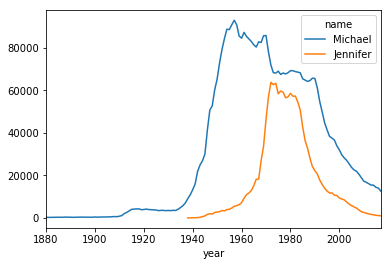

In [84]:
subset = total_births[["Michael", "Jennifer"]]
subset.plot()

# Exercises

## Q3: unique names

how many unique names appear in our top 1000 list?  Use the `.unique()` method on the "name" `Series` to get a an array (it will actually be a NumPy `ndarray` of objects)

---

### Begin my solution for Q3

Get a series of the `"name"` column from the `top` dataframe. Then, get the number of unique names.

In [118]:
topnames = top.name
unique_names = topnames.unique()
num_unique = len(unique_names)
print("There are {} unique names.".format(num_unique))

There are 7134 unique names.


### End my solution to Q3

---

## Q4: gender neutral names

What are all the names that appear for both boys and girls?

---

### Begin my solution Q4

This probably isn't the most elegant methood, but it seems to work

In [187]:
# group by names, and sum up births for each
girl_names = girls.groupby('name').sum()
boy_names = boys.groupby('name').sum()

# just grab births column
girl_names = girl_names['births']
boy_names = boy_names['births']

neutral_names = [] # will hold the names we're looking for
# loop through the unique names
for name in unique_names:
    if (name in boy_names) and (name in girl_names): # then add it to list
        neutral_names.append(name)

num_neutral = len(neutral_names)
print("There are {} neutral names.".format(num_neutral))

There are 709 neutral names.


We could print them all out, but that would take up a lot of room. Let's print out the first few, though:

In [186]:
for name in neutral_names[:50]:
    print(name)

Mary
Anna
Emma
Elizabeth
Minnie
Margaret
Ida
Alice
Bertha
Sarah
Annie
Clara
Ella
Florence
Cora
Martha
Laura
Nellie
Grace
Carrie
Maude
Mabel
Bessie
Jennie
Gertrude
Julia
Hattie
Edith
Mattie
Rose
Catherine
Lillian
Ada
Lillie
Helen
Jessie
Louise
Ethel
Lula
Myrtle
Eva
Frances
Lena
Lucy
Edna
Maggie
Pearl
Daisy
Fannie
Josephine


### end my solution to Q4

---

## Q5: name diversity

We want to make a plot of how many names it takes to reach 50% of the births in a given year.  Let's start with the boys names:

In [198]:
boys = top[top.sex == "M"]
boys

name sex  births  year      prop
year sex                                               
1880 M   942           John   M    9655  1880  0.087383
         943        William   M    9532  1880  0.086269
         944          James   M    5927  1880  0.053642
         945        Charles   M    5348  1880  0.048402
         946         George   M    5126  1880  0.046393
         947          Frank   M    3242  1880  0.029342
         948         Joseph   M    2632  1880  0.023821
         949         Thomas   M    2534  1880  0.022934
         950          Henry   M    2444  1880  0.022119
         951         Robert   M    2415  1880  0.021857
         952         Edward   M    2364  1880  0.021395
         953          Harry   M    2152  1880  0.019477
         954         Walter   M    1755  1880  0.015884
         955         Arthur   M    1599  1880  0.014472
         956           Fred   M    1569  1880  0.014200
         957         Albert   M    1493  1880  0.013512
         958         Samuel   M    1024  1880  0.009268
         959          David   M     869  1880  0.007865
         960          Louis   M     828  1880  0.007494
         961            Joe   M     731  1880  0.006616
         962        Charlie   M     730  1880  0.006607
         963       Clarence   M     730  1880  0.006607
         964        Richard   M     728  1880  0.006589
         965         Andrew   M     644  1880  0.005829
         966         Daniel   M     643  1880  0.005819
         967         Ernest   M     615  1880  0.005566
         968           Will   M     588  1880  0.005322
         969          Jesse   M     569  1880  0.005150
         970          Oscar   M     544  1880  0.004923
         971          Lewis   M     517  1880  0.004679
...                     ...  ..     ...   ...       ...
2017 M   1911478     Simeon   M     211  2017  0.000115
         1911479     Yadiel   M     211  2017  0.000115
         1911476        Ira   M     211  2017  0.000115
         1911477     Ledger   M     211  2017  0.000115
         1911475        Avi   M     211  2017  0.000115
         1911480     Maddux   M     210  2017  0.000114
         1911481     Seamus   M     210  2017  0.000114
         1911482        Jad   M     209  2017  0.000114
         1911483   Jeremias   M     209  2017  0.000114
         1911484      Kylen   M     209  2017  0.000114
         1911485     Rashad   M     208  2017  0.000113
         1911486     Santos   M     208  2017  0.000113
         1911489  Dominique   M     207  2017  0.000113
         1911490   Gianluca   M     207  2017  0.000113
         1911491    Jovanni   M     207  2017  0.000113
         1911488      Craig   M     207  2017  0.000113
         1911487     Cedric   M     207  2017  0.000113
         1911492     Bishop   M     205  2017  0.000112
         1911493    Brenden   M     204  2017  0.000111
         1911494      Anton   M     203  2017  0.000111
         1911495     Camron   M     203  2017  0.000111
         1911496  Giancarlo   M     203  2017  0.000111
         1911497       Lyle   M     203  2017  0.000111
         1911498     Alaric   M     202  2017  0.000110
         1911499     Decker   M     202  2017  0.000110
         1911500    Eliezer   M     202  2017  0.000110
         1911501     Ramiro   M     202  2017  0.000110
         1911502    Yisroel   M     202  2017  0.000110
         1911506    Marquis   M     201  2017  0.000110
         1911507     Turner   M     201  2017  0.000110

[137997 rows x 5 columns]

Now, to understand the process, let's work just on a particular year, 2015

In [208]:
b15 = boys[boys.year == 2015]
b15

name sex  births  year      prop
year sex                                               
2015 M   1845193       Noah   M   19613  2015  0.010270
         1845194       Liam   M   18355  2015  0.009611
         1845195      Mason   M   16610  2015  0.008697
         1845196      Jacob   M   15938  2015  0.008345
         1845197    William   M   15889  2015  0.008320
         1845198      Ethan   M   15069  2015  0.007890
         1845199      James   M   14799  2015  0.007749
         1845200  Alexander   M   14531  2015  0.007609
         1845201    Michael   M   14413  2015  0.007547
         1845202   Benjamin   M   13692  2015  0.007169
         1845203     Elijah   M   13628  2015  0.007136
         1845204     Daniel   M   13490  2015  0.007064
         1845205      Aiden   M   13449  2015  0.007042
         1845206      Logan   M   12910  2015  0.006760
         1845207    Matthew   M   12737  2015  0.006669
         1845208      Lucas   M   12297  2015  0.006439
         1845209    Jackson   M   12258  2015  0.006418
         1845210      David   M   11781  2015  0.006169
         1845211     Oliver   M   11649  2015  0.006100
         1845212     Jayden   M   11532  2015  0.006038
         1845213     Joseph   M   11471  2015  0.006006
         1845214    Gabriel   M   10859  2015  0.005686
         1845215     Samuel   M   10853  2015  0.005683
         1845216     Carter   M   10771  2015  0.005640
         1845217    Anthony   M   10618  2015  0.005560
         1845218       John   M   10373  2015  0.005431
         1845219      Dylan   M   10274  2015  0.005380
         1845220       Luke   M   10270  2015  0.005378
         1845221      Henry   M   10164  2015  0.005322
         1845222     Andrew   M   10096  2015  0.005286
...                     ...  ..     ...   ...       ...
         1846163      Robin   M     213  2015  0.000112
         1846164     Yadiel   M     213  2015  0.000112
         1846165    Yisroel   M     212  2015  0.000111
         1846169       Todd   M     211  2015  0.000110
         1846171      Yahya   M     211  2015  0.000110
         1846170     Truman   M     211  2015  0.000110
         1846166     Aarush   M     211  2015  0.000110
         1846168   Deangelo   M     211  2015  0.000110
         1846167      Chevy   M     211  2015  0.000110
         1846172      Boden   M     210  2015  0.000110
         1846173    Brixton   M     210  2015  0.000110
         1846174        Ean   M     210  2015  0.000110
         1846175    Dangelo   M     209  2015  0.000109
         1846176    Gilbert   M     209  2015  0.000109
         1846177     Haiden   M     209  2015  0.000109
         1846178        Kye   M     209  2015  0.000109
         1846179      Kylen   M     209  2015  0.000109
         1846180     Malaki   M     208  2015  0.000109
         1846184    Osvaldo   M     207  2015  0.000108
         1846185     Yaakov   M     207  2015  0.000108
         1846183      Leroy   M     207  2015  0.000108
         1846182      Juelz   M     207  2015  0.000108
         1846181     Bishop   M     207  2015  0.000108
         1846186    Frankie   M     206  2015  0.000108
         1846187     Freddy   M     206  2015  0.000108
         1846188     Reagan   M     206  2015  0.000108
         1846189       Ayan   M     204  2015  0.000107
         1846190     Camren   M     204  2015  0.000107
         1846191    Deshawn   M     204  2015  0.000107
         1846192    Jayvion   M     204  2015  0.000107

[1000 rows x 5 columns]

In [190]:
b15.info

<bound method DataFrame.info of                        name sex  births  year      prop
year sex                                               
2015 M   1845193       Noah   M   19613  2015  0.010270
         1845194       Liam   M   18355  2015  0.009611
         1845195      Mason   M   16610  2015  0.008697
         1845196      Jacob   M   15938  2015  0.008345
         1845197    William   M   15889  2015  0.008320
         1845198      Ethan   M   15069  2015  0.007890
         1845199      James   M   14799  2015  0.007749
         1845200  Alexander   M   14531  2015  0.007609
         1845201    Michael   M   14413  2015  0.007547
         1845202   Benjamin   M   13692  2015  0.007169
         1845203     Elijah   M   13628  2015  0.007136
         1845204     Daniel   M   13490  2015  0.007064
         1845205      Aiden   M   13449  2015  0.007042
         1845206      Logan   M   12910  2015  0.006760
         1845207    Matthew   M   12737  2015  0.006669
         1845208

We'll use the `cumsum()` property to do a cumulative sum over the `prop` column we added previously

In [192]:
prop_cumsum = b15.sort_values(by="prop", ascending=False)["prop"].cumsum()
prop_cumsum

year  sex         
2015  M    1845193    0.010270
           1845194    0.019881
           1845195    0.028578
           1845196    0.036923
           1845197    0.045243
           1845198    0.053133
           1845199    0.060882
           1845200    0.068491
           1845201    0.076038
           1845202    0.083207
           1845203    0.090343
           1845204    0.097406
           1845205    0.104448
           1845206    0.111208
           1845207    0.117878
           1845208    0.124316
           1845209    0.130735
           1845210    0.136904
           1845211    0.143003
           1845212    0.149041
           1845213    0.155048
           1845214    0.160734
           1845215    0.166417
           1845216    0.172056
           1845217    0.177616
           1845218    0.183048
           1845219    0.188427
           1845220    0.193805
           1845221    0.199127
           1845222    0.204413
                        ...   
           1846161  

and now we can use `searchsorted` to return the position where "if the corresponding elements in v were inserted before the indices, the order of self would be preserved." (see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)

In [195]:
prop_cumsum.searchsorted(0.5)

array([134])

Since we start counting at 0, we add 1 to this to get the number of names needed in this year to reach 50% of births.

In [196]:
num_boy_names = prop_cumsum.searchsorted(0.5)[0]+1
num_boy_names

135

Now generalize this to a function that you can use `apply()` on and make a plot of the number of names to reach 50% by year

---

### begin my solution for Q5

To be honest I am totally lost at this point ... not sure where to even begin.

In particular, I'm very confused because there's a "year" index and a "year" column. I can't figure out how to do what was done above for each year, without going and getting a new data frame for each year.